In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS

import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
c = SkyCoord(ra = 217.309*u.deg, dec = 16.658*u.deg, frame='icrs')
r = 15 * u.arcminute
result_table= Gaia.cone_search_async(c, r)

INFO: Query finished. [astroquery.utils.tap.core]


In [3]:
table = result_table.get_results()

table

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object,float64
1635721458409799680,Gaia DR2 1235408451766174976,1235408451766174976,496268710,2015.5,217.30596259874648,0.09513321493232176,16.66518682402546,0.1044837869944028,0.2761684890724872,0.1293665051906745,2.1347759,-8.517433716371416,0.1925673390429867,-19.08419729692951,0.21010305962851203,0.09424466,-0.32048658,-0.034990575,-0.14715552,-0.42357677,0.03668093,-0.40176144,-0.17969242,0.34068424,-0.1008859,143,0,141,2,0.6940575,147.06735,0.0,0.0,31,False,1.8161185,1.5777015016803506,0.031021078586617894,-0.123331,16,9,0.20185892,0,16,False,140,1890.479147547748,2.3918115938748294,790.39636,17.496937,13,1026.0790421244978,13.19970683883879,77.734985,17.823437,12,1245.7918353116172,7.940453638501775,156.89177,17.023306,1.2017434,0,0.80013084,0.32649994,0.4736309,--,--,0,--,--,--,NOT_AVAILABLE,13.169747169625188,65.08510838476725,208.78361144202552,29.608393706470675,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+1235408451766174976,--,0.007753976563897576
1635721458409799680,Gaia DR2 1235408447471375488,1235408447471375488,780409170,2015.5,217.30111036522848,0.8917114474016802,16.664289614575587,1.3944646136404488,2.369628538902968,1.3243410130916202,1.7892888,-4.486254444912251,2.436948945

In [4]:
ra = table["ra"]

dec = table["dec"]

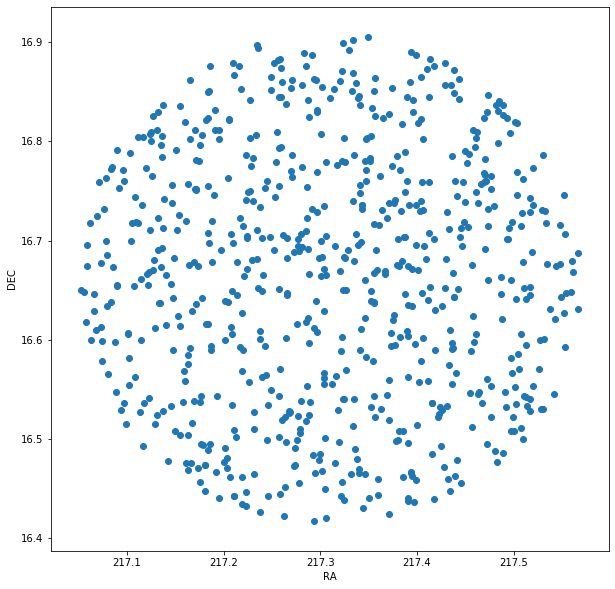

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(ra, dec, marker='o')
# plt.scatter(table.ra[idx], table.dec[idx], marker='o', c='r',alpha=0.7)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

# Image

In [6]:
dir_ = "../../Notes/2020_02_04_Astropy_and_Fits/data/"

In [7]:
!ls $dir_

PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [8]:
image = "PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits"

In [9]:
print(dir_+image)
f = fits.open(dir_+image)
data = f[0].data #this is the image array

../../Notes/2020_02_04_Astropy_and_Fits/data/PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [10]:
print (f[0].data)

[[ 950.1195   828.3512   794.58575 ...  882.8172   851.57056  918.08606]
 [1314.2125  1029.75    1274.6445  ... 1307.4128  1330.3835  1520.352  ]
 [1370.7009  1161.3257  1184.0637  ... 1300.1604  1288.3566  1326.317  ]
 ...
 [1715.98    1341.2823  1293.5846  ... 1144.3986  1093.1195  1438.387  ]
 [1744.9568  1337.1195  1247.6532  ... 1150.5416  1123.4219  1512.558  ]
 [1762.8173  1284.9335  1317.8778  ... 1133.846   1113.6544  1570.3055 ]]


In [11]:
header = f[0].header

header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

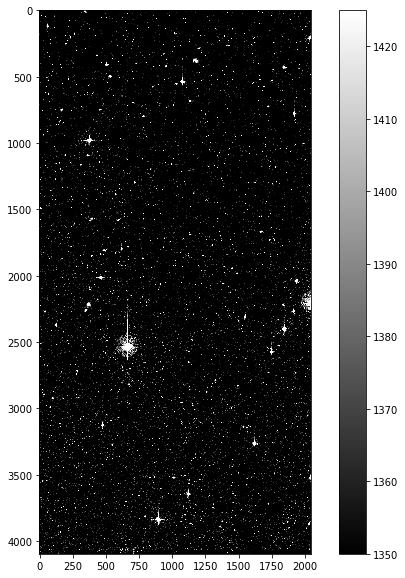

In [12]:
plt.figure(figsize=(10,10))


mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

#vmin = mean - .5*sigma
#vmax = mean + .5*sigma
vmin = 1350
vmax = 1425

plt.imshow(data, vmin = vmin, vmax = vmax, cmap = "gray")
plt.colorbar()

In [13]:
w = wcs.WCS(f[0].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


# Pixel Coordinates / Overplotting

In [14]:
radec = np.array([ra, dec]).T

radec

array([[217.3059626 ,  16.66518682],
       [217.30111037,  16.66428961],
       [217.30419857,  16.67094984],
       ...,
       [217.23418848,  16.89742289],
       [217.07045214,  16.75933061],
       [217.34922894,  16.90498424]])

In [15]:
pixels = w.wcs_world2pix(radec, 1)

pixels

array([[1484.98433027,  584.31404285],
       [1468.42515455,  587.60205066],
       [1478.83219079,  563.8360864 ],
       ...,
       [1235.00668515, -240.93654819],
       [ 678.66128546,  253.34763746],
       [1627.41797316, -270.06566022]])

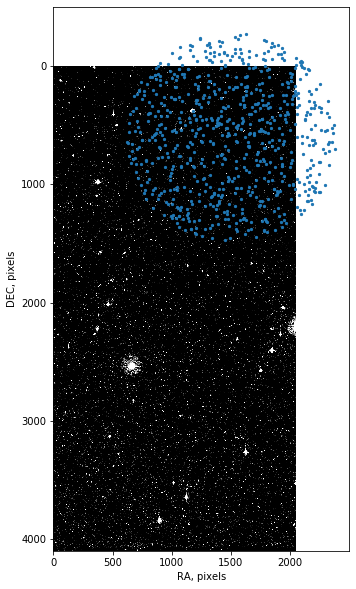

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(data, vmin = vmin, vmax = vmax, cmap = "gray")
plt.scatter(pixels[:,0], pixels[:,1], marker='o', s = 5, cmap = 'Red')
plt.xlabel('RA, pixels')
plt.ylabel('DEC, pixels')
plt.show()

# plt.figure(figsize=(10,10))
# plt.imshow(data, vmin = vmin, vmax = vmax, cmap = "gray")
# plt.colorbar()

# Finding Stars

In [17]:
from astropy.convolution import convolve, Box1DKernel, Box2DKernel

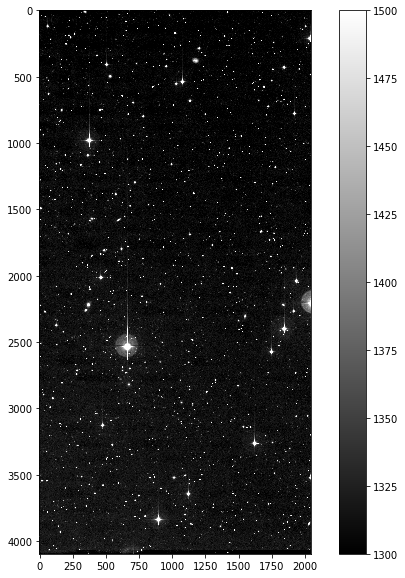

In [18]:
smoothimage = convolve(data,Box2DKernel(5)) #creating a smoother image
im = np.copy(smoothimage)

plt.figure(figsize = (10,10))
plt.imshow(im, vmin = 1300, vmax = 1500, cmap = "gray")
plt.colorbar()

In [19]:
foo = np.arange(12).reshape(3,4)
foo[1,2]= 111
print(foo)

sy,sx = foo.shape
indmax = np.argmax(foo) #argmax is giving position of largest value in array  (after turning it into a flattened array)
xindmax = indmax // sx
yindmax = indmax % sx
print(xindmax, yindmax)
print(foo[xindmax,yindmax])
print(sx,sy)
print(indmax)


[[  0   1   2   3]
 [  4   5 111   7]
 [  8   9  10  11]]
1 2
111
4 3
6


In [20]:
def findstars(image, nstar = 10):
    
    npad = 5
#     nstar = 10
    blankval = -1
    
    #initialize output arrays
    x = np.zeros(nstar).astype('int32')
    y = np.zeros(nstar).astype('int32')
    flux = np.zeros(nstar)
    
    #trim edges of image
    image[0:npad,:] = blankval
    image[:,0:npad] = blankval
    
    #loop over stars
    for i in np.arange(nstar):
        indmax = np.argmax(image)
        y[i], x[i] = np.unravel_index(indmax, image.shape)
        flux[i] =  image[y[i],x[i]]
        
        print(i, x[i], y[i], flux[i])
        
        image[y[i]-npad : y[i]+npad, x[i]-npad : x[i]+npad] = blankval
    
    return x, y, flux
        
#     for i in np.arange(nstar):
#         indmax = np.argmax(image)
#         y[i], x[i] = np.unravel_index(indmax,image.shape)
# #         y[i] = indmax // sx
# #         x[i] = indmax % sx
#         flux[i] = image[y[i],x[i]]
#         print(i,x[i],y[i],flux[i])
        
#         image [y[i]-npad:y[i]+npad, x[i]-npad:x[i]+npad] = blankval #covering stars with black boxes

In [21]:
x, y, flux = findstars(im,500)

0 665 2538 61055.8125
1 2042 213 61038.51953125
2 379 981 61033.5390625
3 666 2525 61027.6796875
4 666 2547 61022.37109375
5 666 2531 61017.89453125
6 1847 2401 61005.88671875
7 900 3836 60993.33203125
8 1624 3262 60808.03515625
9 666 2519 60655.82421875
10 666 2552 60577.890625
11 378 986 60172.609375
12 1080 539 60017.76171875
13 1750 2573 59994.23828125
14 1937 2040 59971.578125
15 378 975 59950.45703125
16 899 3841 59901.63671875
17 466 2014 59771.47265625
18 899 3830 59692.9140625
19 1125 3643 59060.703125
20 479 3126 57164.37890625
21 509 410 55701.8203125
22 2044 3522 55171.59765625
23 1845 432 54910.06640625
24 1846 2406 54506.3671875
25 1923 779 53433.73046875
26 666 2557 51944.69921875
27 1846 2395 51308.58984375
28 378 991 51179.39453125
29 2041 218 51061.00390625
30 1917 2267 50892.84375
31 666 2513 50243.39453125
32 1137 682 50199.18359375
33 1624 3267 49885.125
34 1624 3256 49369.15625
35 1016 3520 49069.0625
36 368 1095 48871.5390625
37 2041 207 48653.59375
38 666 2507 4

295 132 2081 6268.994140625
296 1706 3205 6225.91943359375
297 1951 2051 6202.35400390625
298 1774 329 6193.2392578125
299 157 3113 6155.2275390625
300 723 3690 6138.07373046875
301 479 3136 6015.32861328125
302 1887 3896 5995.15673828125
303 1702 1014 5968.11328125
304 280 3445 5952.47216796875
305 401 2665 5903.888671875
306 1119 3642 5793.865234375
307 1846 2431 5761.576171875
308 1850 432 5710.482421875
309 379 1026 5703.1591796875
310 778 1121 5598.3330078125
311 372 985 5591.40771484375
312 1572 3705 5551.0888671875
313 685 1475 5508.8837890625
314 1313 3720 5362.763671875
315 629 647 5253.94970703125
316 1225 321 5210.54833984375
317 1208 2165 5188.234375
318 541 3089 5133.97216796875
319 365 1920 5119.41015625
320 1994 1004 5090.17431640625
321 811 952 5086.4853515625
322 374 567 5081.16552734375
323 621 1803 5078.693359375
324 1662 1554 5077.40771484375
325 858 575 5070.63671875
326 368 1089 5055.935546875
327 1206 293 5039.3623046875
328 1445 3095 5039.2099609375
329 484 3126

In [22]:
x,y,flux

(array([ 665, 2042,  379,  666,  666,  666, 1847,  900, 1624,  666,  666,
         378, 1080, 1750, 1937,  378,  899,  466,  899, 1125,  479,  509,
        2044, 1845, 1846, 1923,  666, 1846,  378, 2041, 1917,  666, 1137,
        1624, 1624, 1016,  368, 2041,  666,  666,  666,  666,  666,  666,
         666,  666,  666,  131,  670, 1033,   64,  490,  899,  621,  957,
        1080,  378, 1673,  466, 1206, 1846, 1124,  785, 1937,  577, 1750,
        1937, 2041,  899, 1846,  378,  378,  899,  899,  378,  378,  666,
         466, 1080,  478, 1125,  666,  899,  379,  104,  551,   13,  709,
        1726, 1624, 1846, 1750, 1135,   72,  383,  998, 2041, 1305,  459,
         509, 1624, 1080,  659,  670,  666, 1539,  684, 1846,  666, 2041,
        2041,  666, 1624,  664,  899,  666,  666,  666,  666,  666,  666,
         666,  666,  666,  666,  666,  666, 1752, 1452, 1694,  435, 1262,
        2041, 1101,  894, 2008, 1099,  466, 1779, 1624,  316, 1845,  283,
         751,  373, 1923,  287,  203, 

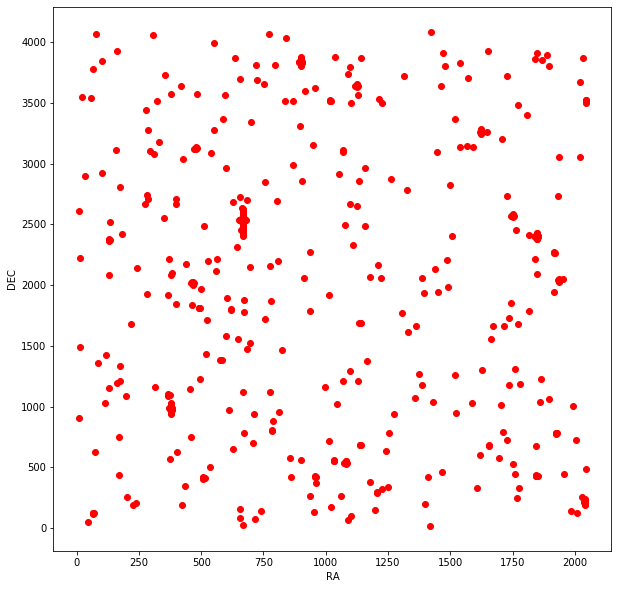

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(x, y, marker='o', c="red")
# plt.scatter(table.ra[idx], table.dec[idx], marker='o', c='r',alpha=0.7)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

# Overplotting: MATCHING!!!

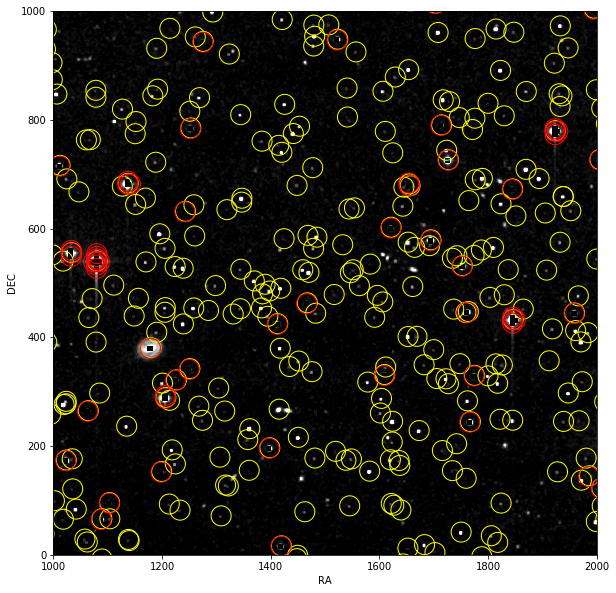

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(im, vmin = 1300, vmax = 1500, cmap = "gray")
plt.scatter(pixels[:,0], pixels[:,1], marker='o', s= 400, facecolor = 'none', edgecolor="yellow")
plt.scatter(x, y, marker='o', s= 400, facecolor = 'none', edgecolor="red")

plt.xlim(1000,2000)
plt.ylim(0,1000)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

# DAO Star Finder

In [30]:
from photutils import DAOStarFinder
from astropy.stats import mad_std

In [32]:
mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

bkg_sigma = mad_std(data)

In [39]:
daofind = DAOStarFinder(fwhm=4., threshold = 10.*bkg_sigma)

In [40]:
sources = daofind(data)

sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,91.48503919576818,1.608677064266311,0.2566913979204767,-0.2938690060761314,-0.2939509307480253,25,0.0,1296.0032958984375,4.077820910856502,-1.5260703714481956
2,885.531351563873,0.9444338700757595,0.4252551070230066,-0.20468262636242154,-0.6129321233256462,25,0.0,3144.000244140625,10.448314599038305,-2.5476156018664953
3,2045.5180669100432,1.8509339654135233,0.3223957841890634,0.16599185177494982,-0.10618702276818989,25,0.0,1330.383544921875,4.39676289157673,-1.6078326140967971
4,680.1978301095953,5.835876659375713,0.6763508763496492,-0.06583806373176332,-0.017883361517414886,25,0.0,7046.0263671875,19.546673483155526,-3.227682145911121
5,346.5398918633736,10.81208356314831,0.5957136415853894,0.12870167882784928,-0.38667027733620835,25,0.0,2706.130859375,3.024104868573702,-1.2014921184065865
6,867.7549129333798,16.081019278804824,0.6459517429592894,-0.3768307581130842,-0.17421627200819756,25,0.0,2025.314453125,2.6137831550407737,-1.0431738868837193
7,1418.6584644272664,15.532022883041696,0.5978100423638611,0.30516398091758634,0.03945102486635063,25,0.0,32549.361328125,112.3909805723902,-5.126828650751407
8,1682.035509716774,17.64510206637686,0.6549901928717978,0.057115433853628224,0.048295030222528915,25,0.0,2477.51806640625,4.072885401290823,-1.5247554763031324
9,318.54167277843027,20.90143551543382,0.6621161590613143,-0.15014843934049008,-0.14832024795350524,25,0.0,3191.09716796875,6.42135803283885,-2.019067213395555


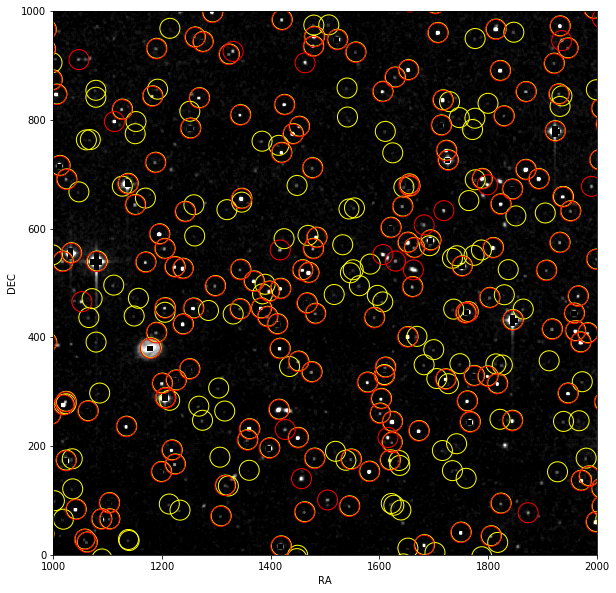

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(im, vmin = 1300, vmax = 1500, cmap = "gray")
plt.scatter(pixels[:,0], pixels[:,1], marker='o', s= 400, facecolor = 'none', edgecolor="yellow")
plt.scatter(sources["xcentroid"], sources["ycentroid"], marker='o', s= 400, facecolor = 'none', edgecolor="red")

plt.xlim(1000,2000)
plt.ylim(0,1000)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()